**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "fcc_starrmpra_junke"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.ASTARR.junke.bed.gz 
K562.hg38.eSTARR.junke.bed.gz 
K562.hg38.LMPRA.junke.bed.gz 
K562.hg38.TMPRA.junke.bed.gz 
K562.hg38.WSTARR.junke.bed.gz 
summary 


In [4]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "K562.hg38.STARRMPRA.junke.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_import = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 447521      9


Chrom,ChromStart,ChromEnd,Name,Score,Strand,Group,Label,Dataset
chr1,115570,115730,peak_both_1,2.188151,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,778660,778890,peak_both_2,2.458460,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,1012990,1013680,peak_both_3,2.903266,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,1064240,1064540,peak_both_4,2.740197,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,1344850,1345150,peak_both_5,2.521903,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,1574880,1575170,peak_both_6,2.217028,.,ASTARR,ASTARR_AB,ASTARR_TR


## Explore data

### Count table

**Helper function**

In [5]:
fun_lab2assay = function(vec_txt_input){
    vec_txt_pattern = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "eSTARR")
    vec_txt_replace = c(
        "ATAC-STARR-seq", "WHG-STARR-seq", 
        "Lenti-MPRA",     "Tiling-MPRA", 
        "eSTARR-seq")
    vec_txt_output = fun_str_map_match(
        vec_txt_input, 
        vec_txt_pattern, 
        vec_txt_replace)
    return(vec_txt_output)
}

fun_lab2direct = function(vec_txt_input){
    vec_txt_pattern = c("A", "AB", "R", "RB")
    vec_txt_replace = c(
        "Active (either direction)", 
        "Active (both direction)", 
        "Repressive (either direction)",     
        "Repressive (both direction)")
    vec_txt_output = fun_str_map_match(
        vec_txt_input, 
        vec_txt_pattern, 
        vec_txt_replace)
    return(vec_txt_output)
}

**Summarize count table**

In [6]:
### count table
dat = dat_region_import
dat = as.data.frame(table(dat$Label))
colnames(dat) = c("Label", "Count")

### arrange info
dat = dat %>% 
    tidyr::separate(
        Label, 
        into=c("Assay", "Direction"), 
        remove = FALSE
    ) %>% 
    dplyr::mutate(
        Assay     = fun_lab2assay(Assay), 
        Direction = fun_lab2direct(Direction),
        Count     = scales::comma(Count)
    ) %>%
    dplyr::select(Label, Assay, Direction, Count)

### assign and show
dat_meta_count = dat
print(dim(dat))
fun_display_table(dat)

[1] 19  4


Label,Assay,Direction,Count
ASTARR_A,ATAC-STARR-seq,Active (either direction),"35,505"
ASTARR_AB,ATAC-STARR-seq,Active (both direction),"11,680"
ASTARR_R,ATAC-STARR-seq,Repressive (either direction),"154,337"
ASTARR_RB,ATAC-STARR-seq,Repressive (both direction),"28,775"
eSTARR_A,eSTARR-seq,Active (either direction),150
eSTARR_AB,eSTARR-seq,Active (both direction),31
eSTARR_R,eSTARR-seq,Repressive (either direction),341
eSTARR_RB,eSTARR-seq,Repressive (both direction),65
LMPRA_A,Lenti-MPRA,Active (either direction),"25,648"
LMPRA_AB,Lenti-MPRA,Active (both direction),"16,603"


**Show summary count table**

In [7]:
### prepare column
dat = dat_meta_count
dat = dat %>%
    dplyr::filter(str_detect(string = Direction, pattern = "either")) %>%
    dplyr::mutate(Label = str_remove(Direction, "\\(either direction\\)")) %>%
    dplyr::mutate(Label = str_trim(Label))

### pivot to wide table
vec = c("ATAC-STARR-seq", "WHG-STARR-seq", "Lenti-MPRA", "Tiling-MPRA", "eSTARR-seq")
dat = dat %>%
    dplyr::select(Assay, Label, Count) %>%
    tidyr::spread(Label, Count) %>%
    dplyr::mutate(Assay = factor(Assay, level = vec)) %>%
    dplyr::arrange(Assay)

### assign and show
dat_meta_count_summary = dat
fun_display_table(dat)

Assay,Active,Repressive
ATAC-STARR-seq,"35,505","154,337"
WHG-STARR-seq,"79,738","62,201"
Lenti-MPRA,"25,648",485
Tiling-MPRA,"6,017",254
eSTARR-seq,150,341


In [8]:
dat = dat_meta_count_summary
dat = dat %>%
    dplyr::rename(
        `Active (A)`      = Active,
        `Repressive (R)`  = Repressive
    )
dat %>% kableExtra::kable("markdown")



|Assay          |Active (A) |Repressive (R) |
|:--------------|:----------|:--------------|
|ATAC-STARR-seq |35,505     |154,337        |
|WHG-STARR-seq  |79,738     |62,201         |
|Lenti-MPRA     |25,648     |485            |
|Tiling-MPRA    |6,017      |254            |
|eSTARR-seq     |150        |341            |

### Distribution of length

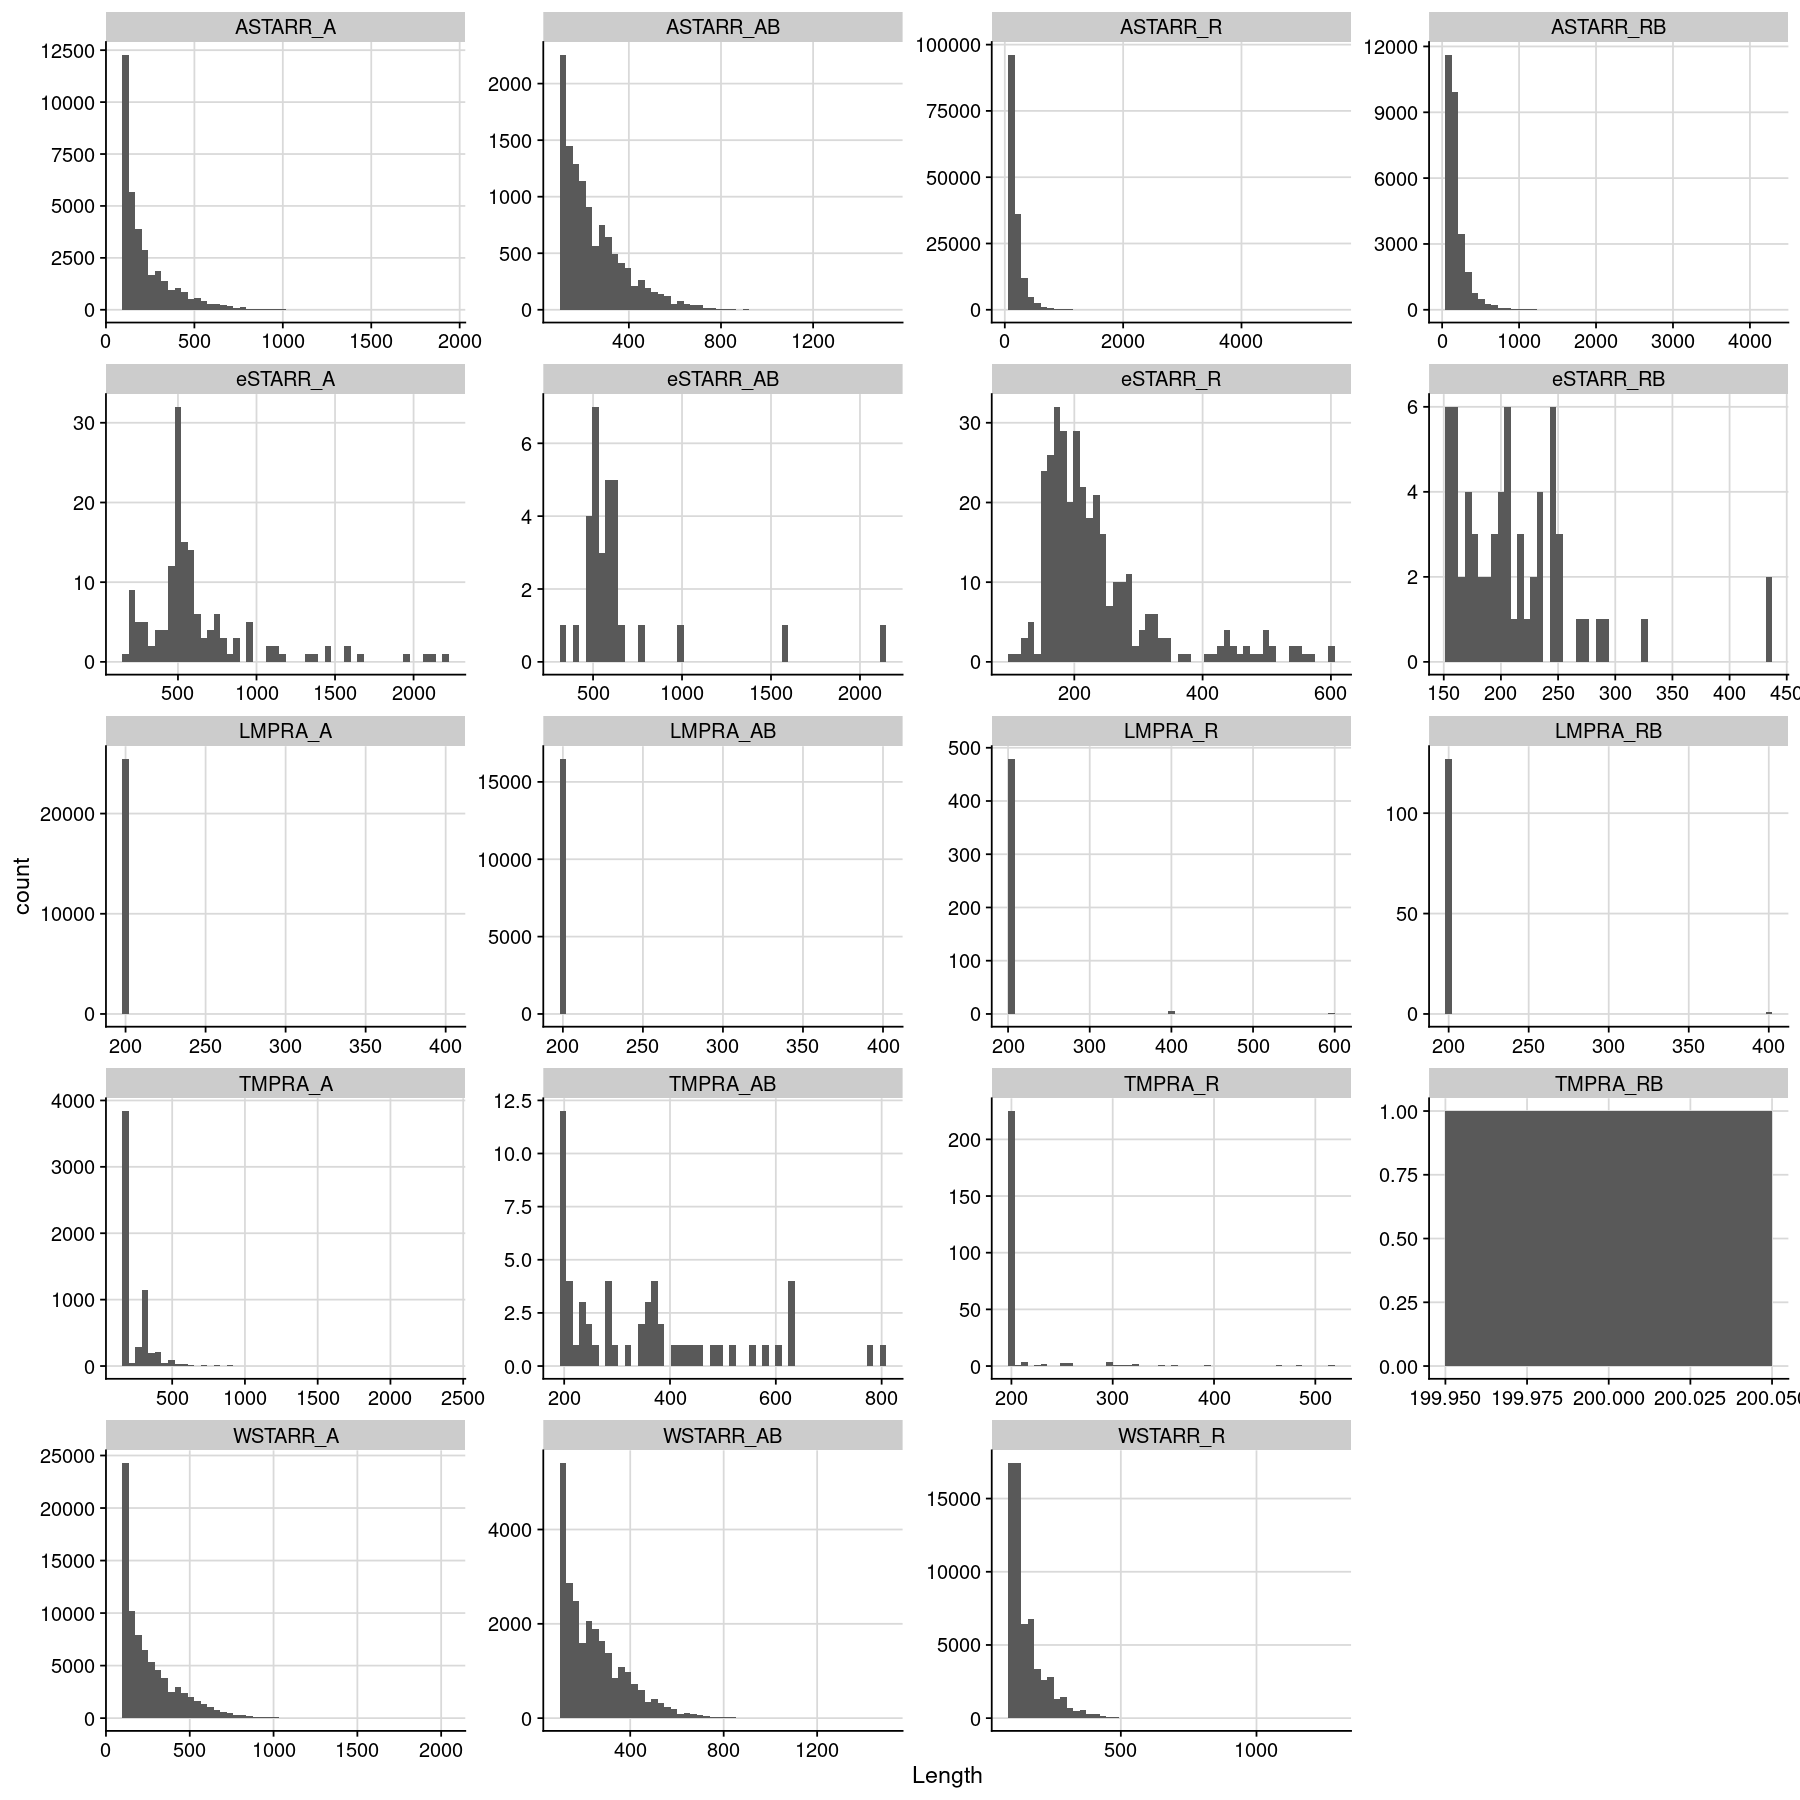

In [9]:
### arrange table for plot
dat = dat_region_import
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart) 

### create plot
gpt = ggplot(dat, aes(x = Length)) + 
    geom_histogram(bins = 50) +
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Label, ncol=4, scales="free")

### show plot
options(repr.plot.height=15, repr.plot.width=15)
print(gpt)

## Save figures

In [10]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

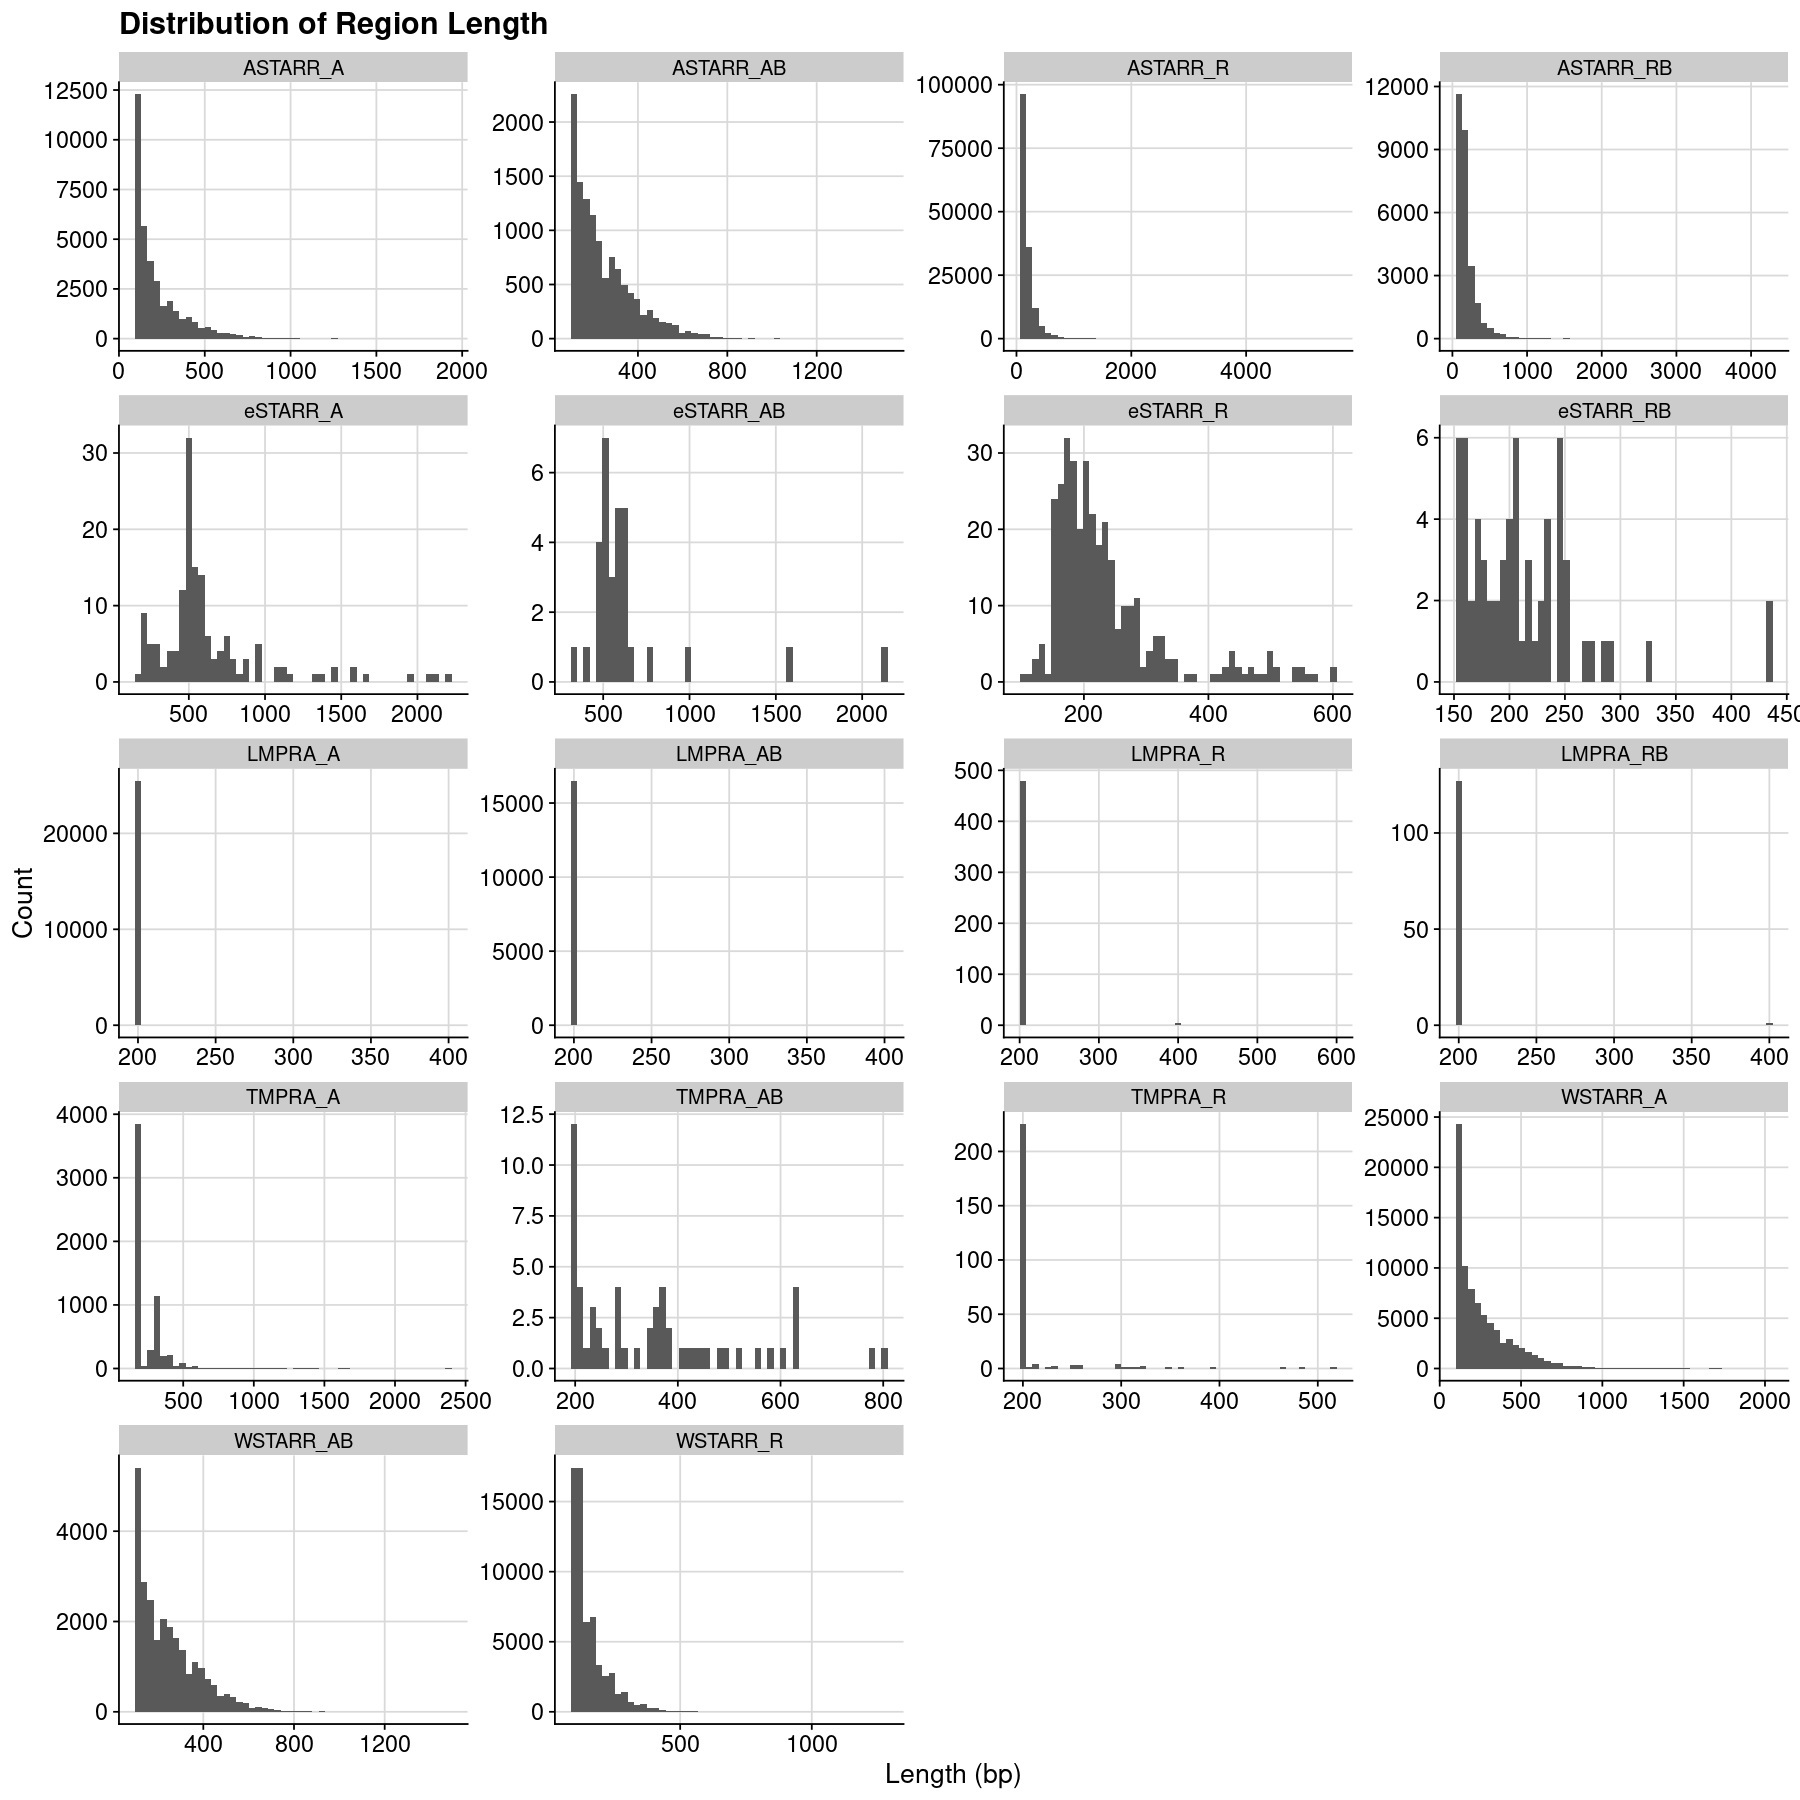

In [11]:
### arrange table for plot
dat = dat_region_import
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart) 

### remove TMPRA_RB bc only 1
dat = dat %>% dplyr::filter(Label != "TMPRA_RB")

### create plot
gpt = ggplot(dat, aes(x = Length)) + 
    geom_histogram(bins = 50) +
    theme_cowplot() + 
    background_grid() +
    theme_text +
    facet_wrap(~Label, ncol=4, scales="free") +
    labs(x = "Length (bp)", y = "Count", title = "Distribution of Region Length")

### assign plot
gpt_export = gpt

### show plot
options(repr.plot.height=15, repr.plot.width=15)
print(gpt)

In [12]:
txt_fdiry = "./"
txt_fname = "fig.region.fcc_starrmpra_junke.distribution.region_length.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 15, width = 15, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_starrmpra_junke.distribution.region_length.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 15, width = 15, units = "in")

## Save tables

```
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "metadata.count.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = dat_meta_count
write_tsv(dat, txt_fpath)
```

In [13]:
txt_fdiry = "./"
txt_fname  = "table.region.fcc_starrmpra_junke.count.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = dat_meta_count
write_tsv(dat, txt_fpath)